<img src="images/enem-logo.png" >

# Análise exploratória ENEM - 2019

* Como as notas estão distribuídas?
* Existe uma relação de uma nota com a outra?
* Como foi o desempenho de cada estado/região?
* Quanto o tipo da escola que o participante estudou influencia em seu desempenho?
* Quanto a renda familiar do participante influencia em seu desempenho?
* Qual a diferença de desempenho entre os participantes com e sem acesso a internet em sua residência?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "darkgrid")
sns.set(rc={"figure.figsize":(15, 10)})
pd.options.display.float_format = "{:,.5f}".format

## Importando dados

##### Vamos utilizar as seguintes variáveis na nossa análise:
* SG_UF_RESIDENCIA: Estado (UF)
* TP_ESCOLA: Tipo da escola que cursou o ensino médio
* TP_DEPENDENCIA_ADM_ESC: Dependência administrativa da escola
* TP_LOCALIZACAO_ESC: Área da localização da escola
* NU_NOTA_CN: Nota da prova de ciências da natureza
* NU_NOTA_CH: Nota da prova de ciências humanas
* NU_NOTA_LC: Nota da prova de linguagens e códigos
* NU_NOTA_MT: Nota da prova de matemática
* NU_NOTA_REDACAO: Nota da prova de redação
* Q006: Questão sobre renda familiar do participante
* Q025: Questão sobre acesso a internet na residência do participante

In [2]:
cols = ["SG_UF_RESIDENCIA","TP_ESCOLA", "TP_DEPENDENCIA_ADM_ESC", 
        "TP_LOCALIZACAO_ESC", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC",
        "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q006", "Q025"]

df = pd.read_csv("data/DADOS/MICRODADOS_ENEM_2019.csv",
                 sep = ";", 
                 usecols = cols, 
                 encoding="iso-8859-1")

print(df.shape)
df.head()

(5095270, 11)


,SG_UF_RESIDENCIA,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025
0,PA,1,nan,nan,472.90000,466.00000,497.30000,369.10000,780.00000,B,A
1,PA,1,nan,nan,358.90000,495.40000,482.30000,416.50000,600.00000,B,A
2,PA,3,4.00000,1.00000,574.20000,538.70000,582.60000,571.50000,640.00000,C,B
3,PA,2,2.00000,1.00000,nan,nan,nan,nan,nan,C,A
4,PA,1,nan,nan,nan,nan,nan,nan,nan,C,A


#### Renomeando e mapeando as variáveis

In [3]:
df.rename(columns={"SG_UF_RESIDENCIA":"UF",
                   "TP_ESCOLA":"TIPO_ESCOLA",
                   "TP_DEPENDENCIA_ADM_ESC":"DEPENDENCIA_ADM_ESCOLA", 
                   "TP_LOCALIZACAO_ESC":"AREA_ESCOLA", 
                   "NU_NOTA_CN":"CIENCIAS_NATUREZA", 
                   "NU_NOTA_CH":"CIENCIAS_HUMANAS", 
                   "NU_NOTA_LC":"LINGUAGENS_CODIGOS", 
                   "NU_NOTA_MT":"MATEMATICA",
                   "NU_NOTA_REDACAO":"REDACAO", 
                   "Q006":"RENDA_FAMILIAR", 
                   "Q025":"ACESSO_INTERNET"}, 
          inplace=True)

map_tp_escola = {
    1: "Não Respondeu",
    2: "Pública", 
    3: "Privada",
    4: "Exterior"
}
df["TIPO_ESCOLA"] = df["TIPO_ESCOLA"].map(lambda x: map_tp_escola[x])

map_area_escola = {
    1: "Urbana",
    2: "Rural"
}
df["AREA_ESCOLA"] = df["AREA_ESCOLA"].map(lambda x: map_area_escola[x], na_action = "ignore")

map_adm_escola = {
    1: "Federal",
    2: "Estadual",
    3: "Municipal", 
    4: "Privada"
}
df["DEPENDENCIA_ADM_ESCOLA"] = df["DEPENDENCIA_ADM_ESCOLA"].map(lambda x: map_adm_escola[x], na_action = "ignore")

map_internet = {
    "A": "Sem internet",
    "B": "Com internet"
}

df["ACESSO_INTERNET"] = df["ACESSO_INTERNET"].map(lambda x: map_internet[x], na_action = "ignore")

#### Tratando dados faltantes

* Iremos analisar apenas os participantes que possuam as 5 notas válidas, ou seja, aqueles que participaram de todas as provas, mais a redação.

In [4]:
df.isna().sum()

UF                              0
TIPO_ESCOLA                     0
DEPENDENCIA_ADM_ESCOLA    3947858
AREA_ESCOLA               3947858
CIENCIAS_NATUREZA         1384837
CIENCIAS_HUMANAS          1172125
LINGUAGENS_CODIGOS        1172125
MATEMATICA                1384837
REDACAO                   1172126
RENDA_FAMILIAR                  0
ACESSO_INTERNET                 0
dtype: int64

In [5]:
df.dropna(how = "any", 
          subset = ["CIENCIAS_NATUREZA", "CIENCIAS_HUMANAS", 
                    "LINGUAGENS_CODIGOS", "MATEMATICA", "REDACAO"], 
          inplace = True)

#### Criando a variável de nota média

In [6]:
df["NOTA_MEDIA"] = (df["CIENCIAS_NATUREZA"] + 
                    df["CIENCIAS_HUMANAS"] + 
                    df["LINGUAGENS_CODIGOS"] + 
                    df["MATEMATICA"] + 
                    df["REDACAO"])/5

## Distribuição das notas

In [7]:
df[["CIENCIAS_HUMANAS", "LINGUAGENS_CODIGOS",
    "CIENCIAS_NATUREZA", "MATEMATICA", "REDACAO", 
    "NOTA_MEDIA"]].describe()

,CIENCIAS_HUMANAS,LINGUAGENS_CODIGOS,CIENCIAS_NATUREZA,MATEMATICA,REDACAO,NOTA_MEDIA
count,"3,702,007.00000","3,702,007.00000","3,702,007.00000","3,702,007.00000","3,702,007.00000","3,702,007.00000"
mean,509.89059,522.39660,477.88327,523.18510,579.76941,522.62499
std,80.97881,62.74888,76.04584,109.02519,182.51164,83.65338
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,450.80000,485.50000,417.80000,435.20000,500.00000,464.04000
50%,513.40000,527.80000,470.30000,501.10000,580.00000,515.02000
75%,568.60000,566.60000,533.20000,597.90000,680.00000,576.76000
max,835.10000,801.70000,860.90000,985.50000,"1,000.00000",850.82000


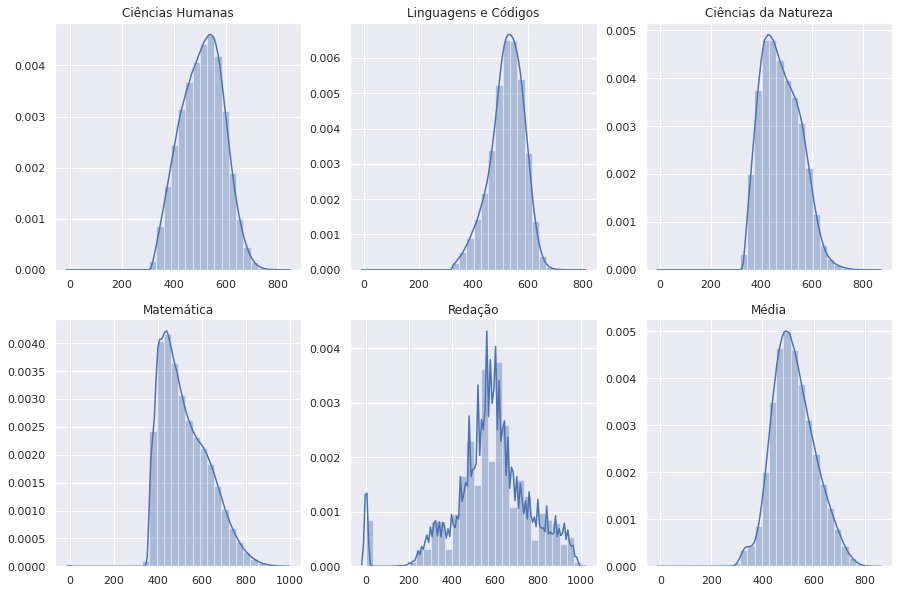

In [8]:
plt.subplot(2, 3, 1)
ax = sns.distplot(df["CIENCIAS_HUMANAS"], bins = 30)
ax.set_title("Ciências Humanas")
ax.set_xlabel("")

plt.subplot(2, 3, 2)
ax = sns.distplot(df["LINGUAGENS_CODIGOS"], bins = 30)
ax.set_title("Linguagens e Códigos")
ax.set_xlabel("")

plt.subplot(2, 3, 3)
ax = sns.distplot(df["CIENCIAS_NATUREZA"], bins = 30)
ax.set_title("Ciências da Natureza")
ax.set_xlabel("")

plt.subplot(2, 3, 4)
ax = sns.distplot(df["MATEMATICA"], bins = 30)
ax.set_title("Matemática")
ax.set_xlabel("")

plt.subplot(2, 3, 5)
ax = sns.distplot(df["REDACAO"], bins = 30)
ax.set_title("Redação")
ax.set_xlabel("")

plt.subplot(2, 3, 6)
ax = sns.distplot(df["NOTA_MEDIA"], bins = 30)
ax.set_title("Média")
ax.set_xlabel("")

plt.savefig("output_images/distplot_materias.png", bbox_inches = "tight")

* Tirando a distribuição da nota de Redação, todas as outras notas possuem distribuições próximas a normalidade.
* Das provas normais, matemática é a que possui a maior média, e também o maior valor máximo, porém isso não implica que é a prova que os participantes tem melhor desempenho, já que, também dentro das provas normais, é a que possui maior desvio padrão, e também a segunda menor mediana, mostrando que é uma nota que varia muito.

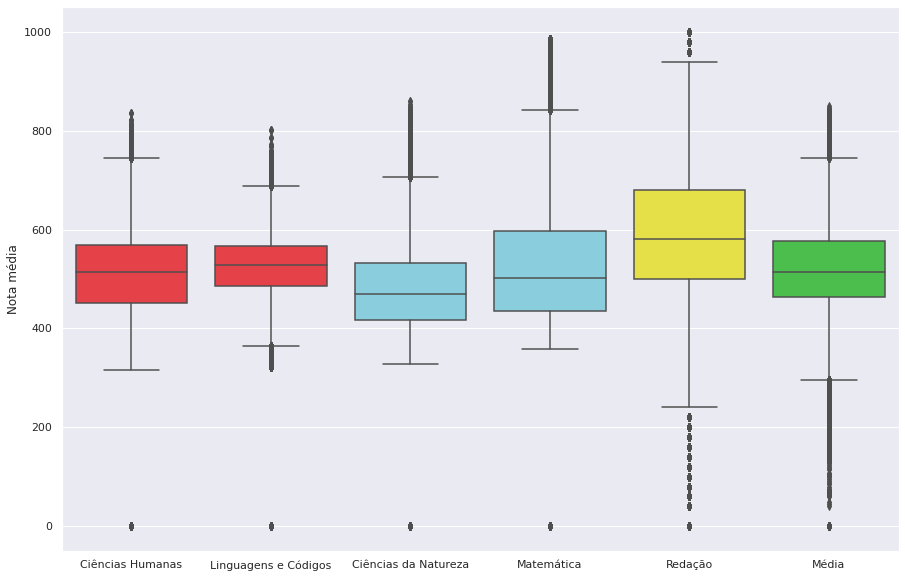

In [9]:
ax = sns.boxplot(x = "variable", y = "value", 
                 data = pd.melt(df[["CIENCIAS_HUMANAS", "LINGUAGENS_CODIGOS",
                                    "CIENCIAS_NATUREZA", "MATEMATICA", "REDACAO", 
                                    "NOTA_MEDIA"]]), 
                palette = {
                    "CIENCIAS_HUMANAS":"#ff2631",
                    "LINGUAGENS_CODIGOS":"#ff2631", 
                    "CIENCIAS_NATUREZA":"#7cd6eb", 
                    "MATEMATICA":"#7cd6eb", 
                    "REDACAO":"#fff82e",
                    "NOTA_MEDIA":"#38d13b", 
                })

ax.set_xticklabels(["Ciências Humanas", "Linguagens e Códigos", 
                    "Ciências da Natureza", "Matemática", "Redação", 
                    "Média"])

ax.set_ylabel("Nota média")
ax.set_xlabel("")

ax.figure.savefig("output_images/box_plot_materias.png", bbox_inches = "tight")

* Gráfico box-plot para melhor visualização para comparar a distribuição das notas.
* Observe que a Redação é a unica nota em que seus outliers estão todos representados com uma distância padrão entre si, isso se deve jusamente ao fato que essa nota se da em intervalos de 20 em 20.
* Veja também que não existem muitos outliers abaixo do limite inferior diferentes de 0 nas provas normais (na verdade existe apenas nas notas de Linguagens e Códigos), isso pode ser explicado pelo fato de que essas provas não são corrigidas de forma tradicional, mas sim pelo método TRI (Teoria da Resposta ao Item), em que cada questão não é avaliada  individualmente, sendo levado em consideração a consistência das respostas do participante.

## Relação entre as notas
* Para verificar se o desempenho do participante em uma determinada matéria afeta diretamente seu desempenho em outra matéria, vamos utilizar o coeficiente de correlação de pearson, que mede a correlação linear entre duas variáveis.

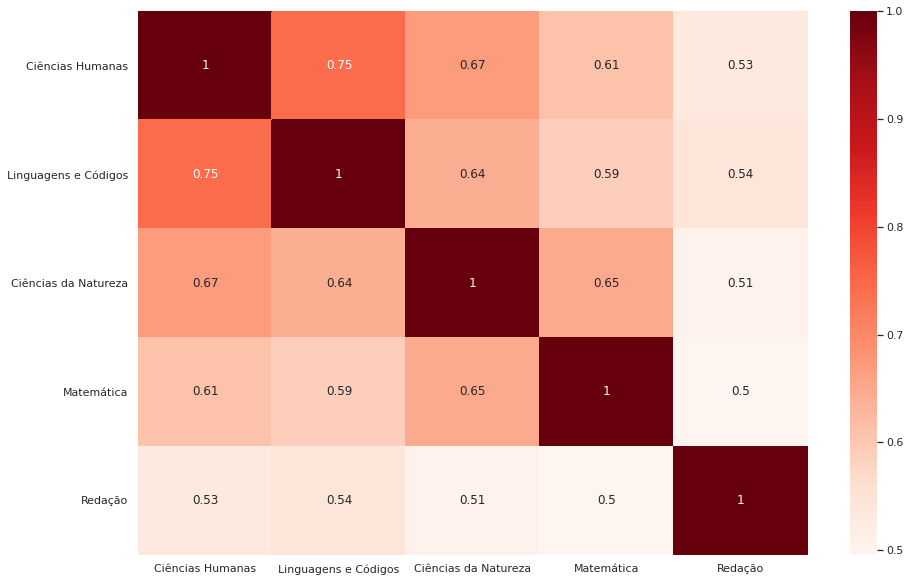

In [10]:
hm  = df[["CIENCIAS_HUMANAS", "LINGUAGENS_CODIGOS",
          "CIENCIAS_NATUREZA", "MATEMATICA", "REDACAO"]].corr("pearson")

ax = sns.heatmap(hm, annot = True, cmap = "Reds", vmax = 1)
ax.set_xticklabels(["Ciências Humanas", "Linguagens e Códigos", 
                    "Ciências da Natureza", "Matemática", "Redação"])
ax.set_yticklabels(["Ciências Humanas", "Linguagens e Códigos", 
                    "Ciências da Natureza", "Matemática", "Redação"])

ax.figure.savefig("output_images/heatmap_materias.png", bbox_inches = "tight")

* Algo no mínimo interessante visto no mapa de calor, é que todas as correlações são consideradas altas (maior que 0.5), podendo mostrar que caso um participante tire uma nota muito alta em uma matéria, será muito difícil ele tirar uma nota baixa em outra, seja ela qual for. 
* Vemos que Ciências Humanas e Linguagens e Códigos são as matérias com maior correlação, sendo uma correlação bastante expressiva. Isso nos diz que caso o participante consiga uma nota alta em uma delas, ele tende a conseguir também um nota alta na outra, o mesmo vale para o caso contrario, ter uma nota baixa em uma, tende a ter uma nota baixa na outra também. Isso pode ser explicado pelo fato de serem provas relativamente próximas uma da outra, compostas principalmente por textos, passando muito pela habilidade do participante de interpretá-los, assim consideradas matérias de humanas.
* Outra correlação interessante é a entre Ciências Humanas e Ciências da Natureza, sendo a segunda maior. São provas que cobram disciplinas como história, geografia, filosofia, química, física... disciplinas que exigem um conhecimento mais geral sobre o mundo, sendo provas que exigem um conhecimento de aplicação das outras duas matérias (linguagens e matemática), e talvez por isso sejam matérias que estão correlacionadas.

## Desempenho por estado e reagião

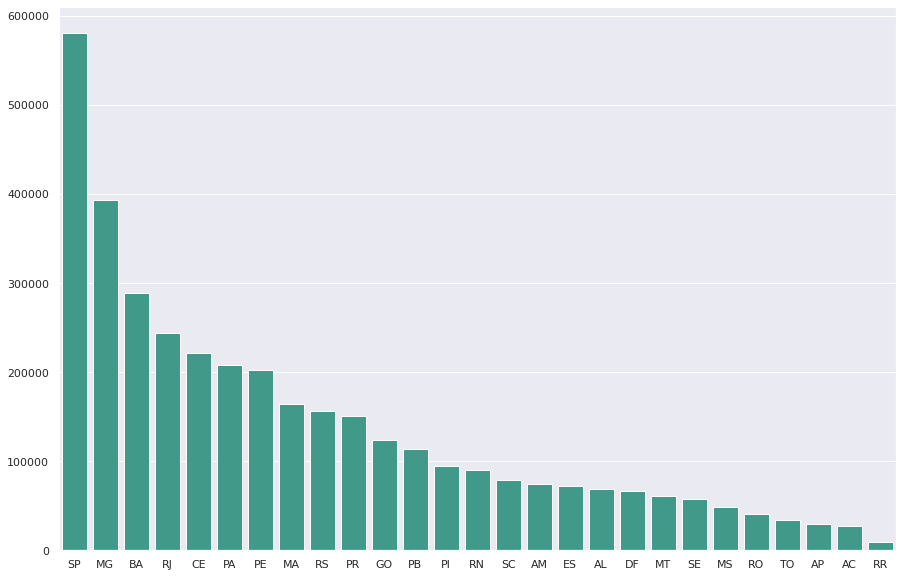

In [11]:
ax = sns.countplot(x = "UF", data = df, 
                 order = df["UF"].value_counts(ascending = False).keys(), 
                 color = "#32a893")

ax.set_ylabel("")
ax.set_xlabel("")

ax.figure.savefig("output_images/barplot_participantes_estados.png", bbox_inches = "tight")

* Análises enviesadas pelos estados com maior número de participantes, principalmente SP e MG

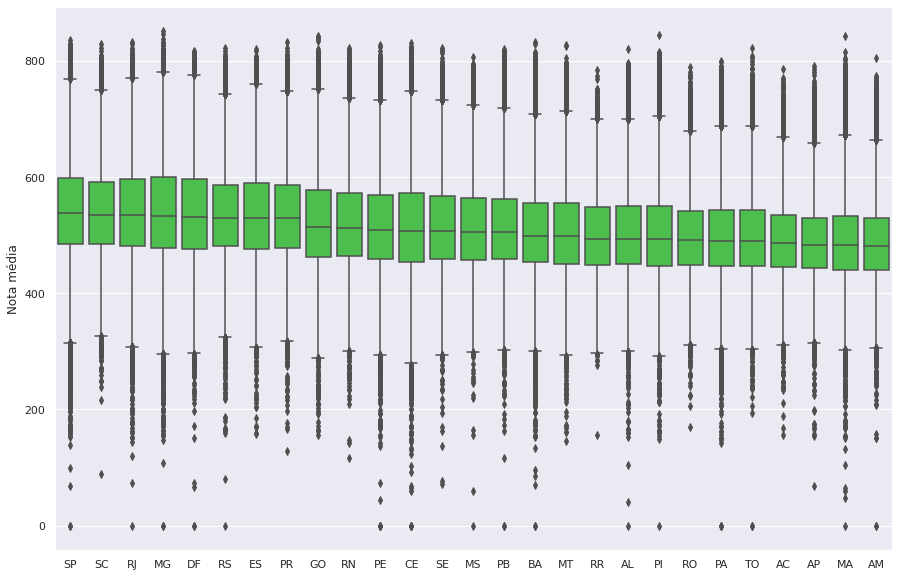

In [12]:
ax = sns.boxplot(x = "UF", y = "NOTA_MEDIA", data = df, 
                 order = df.groupby("UF").median()["NOTA_MEDIA"].\
                 sort_values(ascending = False).keys(), 
                 color = "#38d13b")

ax.set_ylabel("Nota média")
ax.set_xlabel("")

ax.figure.savefig("output_images/boxplot_estados.png", bbox_inches = "tight")

## Desempenho das escolas

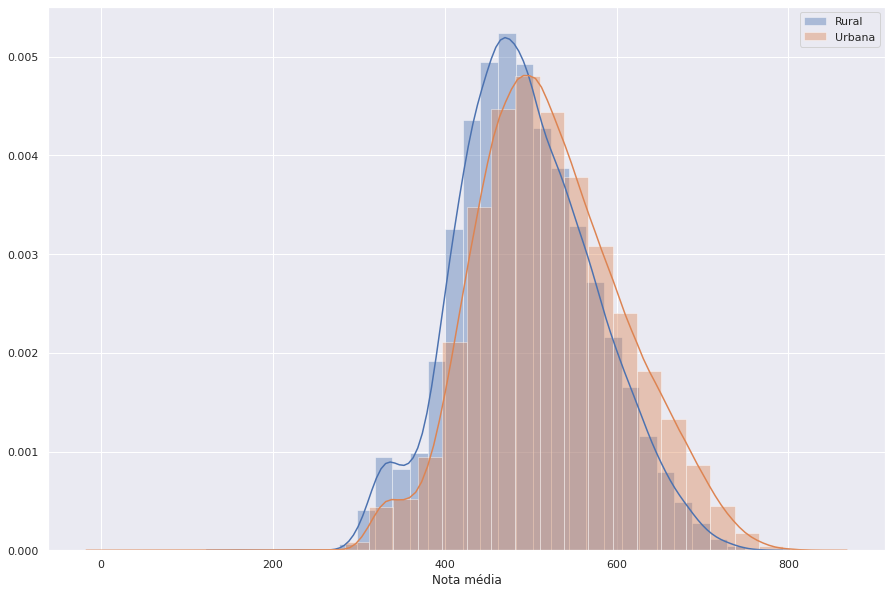

In [13]:
ax = sns.distplot(df[df["AREA_ESCOLA"] == "Rural"]["NOTA_MEDIA"], bins = 30, label = "Rural")
ax = sns.distplot(df[df["AREA_ESCOLA"] == "Urbana"]["NOTA_MEDIA"], bins = 30, ax = ax, label = "Urbana")

ax.set_xlabel("Nota média")
plt.legend()

ax.figure.savefig("output_images/distplot_area.png", bbox_inches = "tight")

* Participantes que concluíram o ensino médio em escolas da área urbana levam vantagem sobre os que concluiram em área rural.

In [14]:
pd.DataFrame(df["TIPO_ESCOLA"].value_counts())

,TIPO_ESCOLA
Não Respondeu,2484853
Pública,1009852
Privada,207302


* Por algum motivo, a grande maioria dos inscritos não respondeu sobre a escola que estudou no ensino médio.
* Nossas análises se basearam apenas nos participantes que responderam.

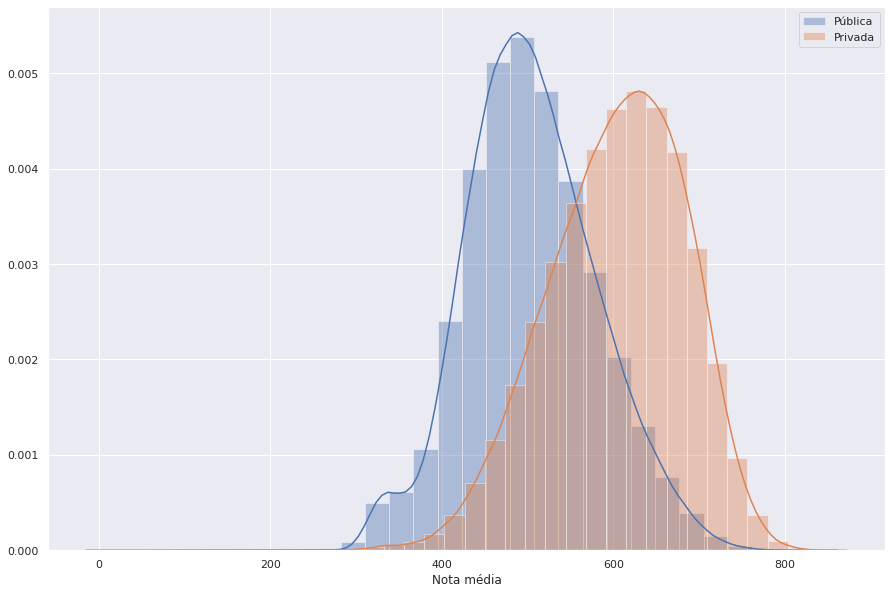

In [15]:
ax = sns.distplot(df[df["TIPO_ESCOLA"] == "Pública"]["NOTA_MEDIA"], bins = 30, label = "Pública")
ax = sns.distplot(df[df["TIPO_ESCOLA"] == "Privada"]["NOTA_MEDIA"], bins = 30, ax = ax, label = "Privada")

ax.set_xlabel("Nota média")
plt.legend()

ax.figure.savefig("output_images/distplot_tipo.png", bbox_inches = "tight")

* Provavelmente aqui esteja o fator que mais impacte no desempenho dos participantes, os que foram alunos de escolas particulares levam ampla vantagem sobre os que foram de escola pública.

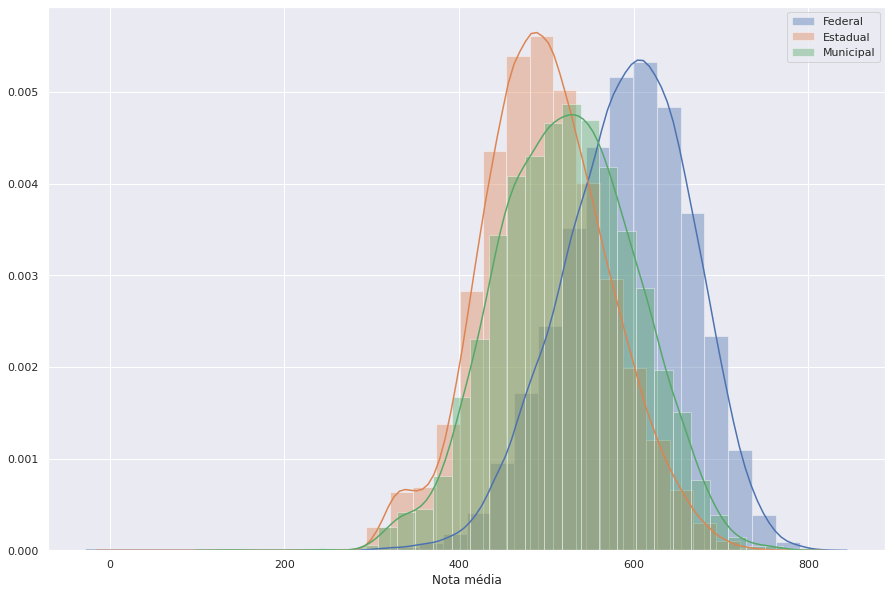

In [16]:
ax = sns.distplot(df[(df["DEPENDENCIA_ADM_ESCOLA"] == "Federal") & 
                     (df["TIPO_ESCOLA"] == "Pública")]["NOTA_MEDIA"], 
                  bins = 30, label = "Federal")
ax = sns.distplot(df[(df["DEPENDENCIA_ADM_ESCOLA"] == "Estadual") & 
                     (df["TIPO_ESCOLA"] == "Pública")]["NOTA_MEDIA"], 
                  bins = 30, ax = ax, label = "Estadual")
ax = sns.distplot(df[(df["DEPENDENCIA_ADM_ESCOLA"] == "Municipal") & 
                     (df["TIPO_ESCOLA"] == "Pública")]["NOTA_MEDIA"], 
                  bins = 30, ax = ax, label = "Municipal")

ax.set_xlabel("Nota média")
plt.legend()

ax.figure.savefig("output_images/distplot_adm.png", bbox_inches = "tight")

* Aqui uma visualização levando em consideração apenas as escolas públicas. 
* Vemos que mesmo entre as escolas públicas, ainda existe uma desigualdade em relação a dependência administrativa, já que claramente participantes que estudaram em escolas federais tem maior probabilidade de alcançar maiores notas.

In [17]:
df.loc[df["UF"].isin(["SP", "RJ", "MG", "ES"]), "REGIAO"] = "Sudeste"
df.loc[df["UF"].isin(["AC", "AP", "AM", "PA", "RO", "TO", "RR"]), "REGIAO"] = "Norte"
df.loc[df["UF"].isin(["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"]), "REGIAO"] = "Nordeste"
df.loc[df["UF"].isin(["DF", "GO", "MT", "MS"]), "REGIAO"] = "Centro-Oeste"
df.loc[df["UF"].isin(["PR", "RS", "SC"]), "REGIAO"] = "Sul"

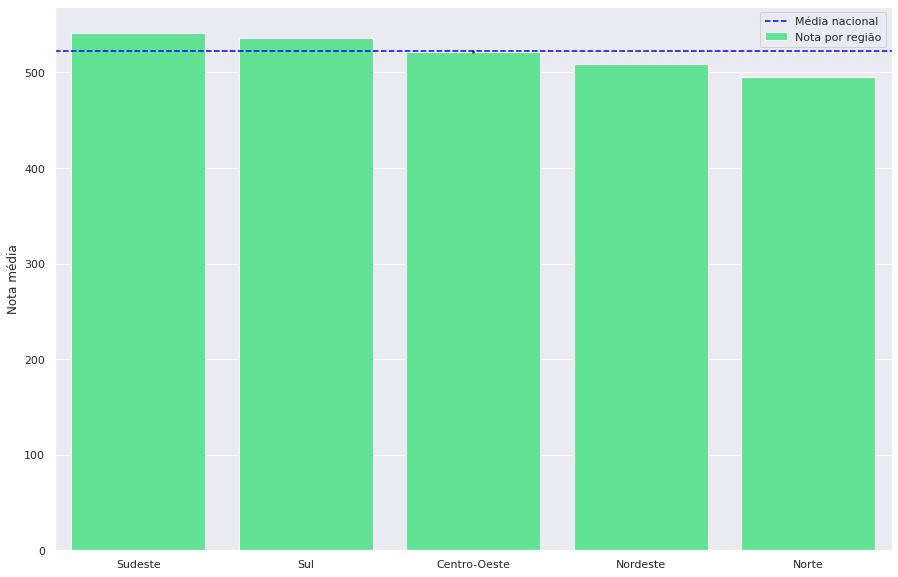

In [18]:
ax = sns.barplot(x = "REGIAO", y = "NOTA_MEDIA", data = df, 
                 order = df.groupby("REGIAO").mean()["NOTA_MEDIA"].\
                        sort_values(ascending = False).keys(), 
                 color = "#4df78e", label = "Nota por região")

ax.axhline(df["NOTA_MEDIA"].mean(), ls='--', color="blue", label = "Média nacional")

ax.set_ylabel("Nota média")
ax.set_xlabel("")

plt.legend(title = "")

ax.figure.savefig("output_images/barplot_regioes_geral.png", bbox_inches = "tight")

* Aqui comparamos as médias regionais com a média nacional. Talvez o ponto mais crítico dessa visualização seja a média abaixo de 500 da região Norte.

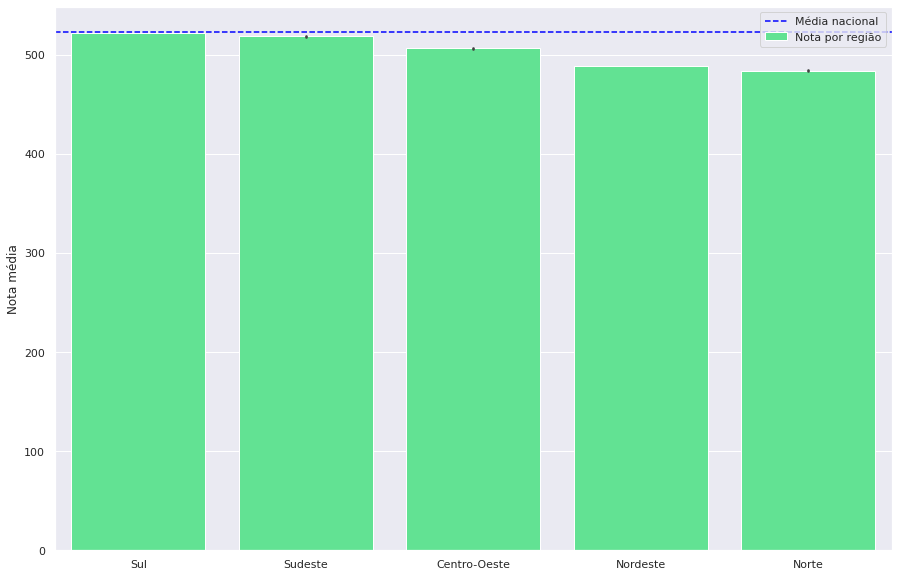

In [19]:
ax = sns.barplot(x = "REGIAO", y = "NOTA_MEDIA", data = df[df["TIPO_ESCOLA"] == "Pública"], 
                 order = df[df["TIPO_ESCOLA"] == "Pública"].groupby("REGIAO").mean()["NOTA_MEDIA"].\
                       sort_values(ascending = False).keys(), 
                 color = "#4df78e", label = "Nota por região")

ax.axhline(df["NOTA_MEDIA"].mean(), ls='--', color="blue", label = "Média nacional")

ax.set_ylabel("Nota média")
ax.set_xlabel("")

plt.legend(title = "")

ax.figure.savefig("output_images/barplot_regioes_publica.png", bbox_inches = "tight")

* Dessa vez analisamos apenas as escolas públicas, e veja que todas as regiões ficam abaixo da média nacional.
* Note também que no gráfico anterior o Sudeste apresentava o melhor desempenho geral, porém quando analisado apenas participantes vindos de escolas públicas, o Sul toma a frente como a região com melhor desempenho.

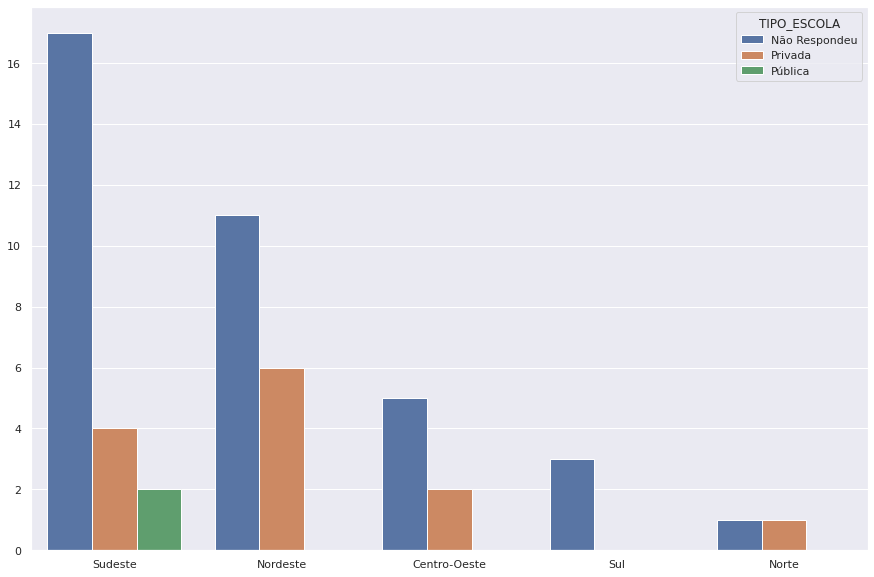

In [20]:
ax = sns.countplot(x = "REGIAO", hue = "TIPO_ESCOLA", data = df[df["REDACAO"] == 1000],
              order = df[df["REDACAO"] == 1000]["REGIAO"].value_counts(ascending = False).keys()) 

ax.set_ylabel("")
ax.set_xlabel("")

ax.figure.savefig("output_images/countplot_redacaomil.png", bbox_inches = "tight")

* Se compararmos apenas o resultado dos participantes que responderam, escancara ainda mais a desigualdade entre os tipos de escola, ainda mais se colocarmos em proporção, uma vez que, como vimos antes, houveram quase 5 vezes mais alunos de escolas públicas do que alunos de escolas particulares.

## Desempenho de acordo com a renda

##### Primeiro vamos fazer um maior agrupamento das rendas de acordo com o salário mínimo da época R$ 998:
* Classe A: Maior que 20 x salário mínimo
* Classe B: Entre 10 x salário mínimo e 20 x salário mínimo
* Classe C: Entre 4 x salário mínimo e 10 x salário mínimo
* Classe D: Entre 2 x salário mínimo e 4 x salário mínimo
* Classe E: Até 2 x salário mínimo
* Sem renda

In [21]:
df.loc[df["RENDA_FAMILIAR"].isin(["Q"]), "CLASSE_ECONOMICA"] = "A"
df.loc[df["RENDA_FAMILIAR"].isin(["N", "O", "P"]), "CLASSE_ECONOMICA"] = "B"
df.loc[df["RENDA_FAMILIAR"].isin(["H", "I", "J", "K", "L", "M"]), "CLASSE_ECONOMICA"] = "C"
df.loc[df["RENDA_FAMILIAR"].isin(["E", "F", "G"]), "CLASSE_ECONOMICA"] = "D"
df.loc[df["RENDA_FAMILIAR"].isin(["B", "C", "D"]), "CLASSE_ECONOMICA"] = "E"
df.loc[df["RENDA_FAMILIAR"].isin(["A"]), "CLASSE_ECONOMICA"] = "Sem renda"

In [22]:
pd.DataFrame(df["CLASSE_ECONOMICA"].value_counts())

,CLASSE_ECONOMICA
E,2154216
D,752486
C,460901
Sem renda,158093
B,129652
A,46659


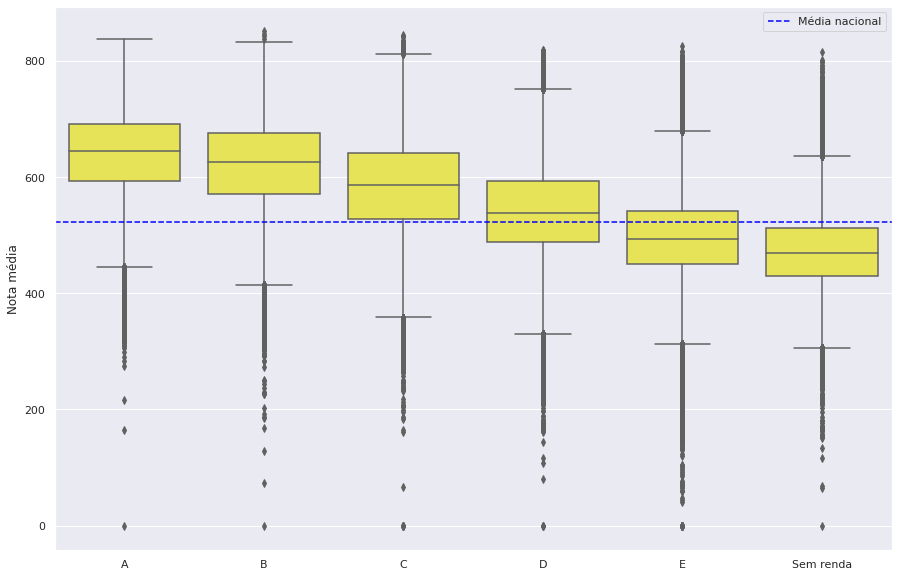

In [23]:
ax = sns.boxplot(x = "CLASSE_ECONOMICA", y = "NOTA_MEDIA", data = df, 
                 order = df.groupby("CLASSE_ECONOMICA").median()["NOTA_MEDIA"].\
                 sort_values(ascending = False).keys(), 
                 color = "#fff940")

ax.axhline(df["NOTA_MEDIA"].mean(), ls='--', color="blue", label = "Média nacional")

ax.set_ylabel("Nota média")
ax.set_xlabel("")

plt.legend()

ax.figure.savefig("output_images/boxplot_classes.png", bbox_inches = "tight")

* O gráfico deixa muito claro que quanto maior a renda, maiores as chances de atingir um melhor desempenho. 
* A situação se agrava qunado isolamos os dois extremos das classes, já que participantes sem renda e da classe E que atingem notas acima ou até mesmo próximas de 700 são considerado outliers, enquanto nas classes mais altas é algo que está dentro da normalidade.

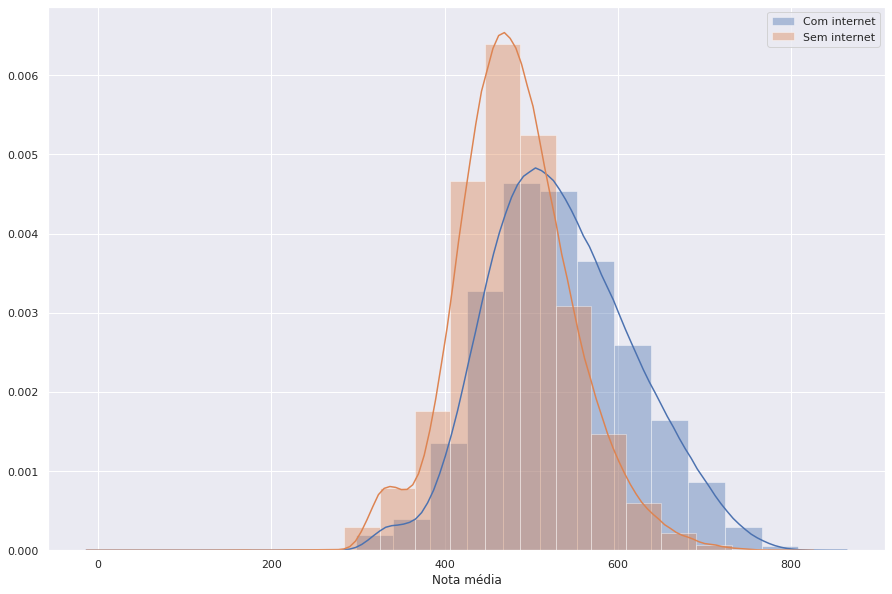

In [24]:
ax = sns.distplot(df[df["ACESSO_INTERNET"] == "Com internet"]["NOTA_MEDIA"], bins = 20, label = "Com internet")
ax = sns.distplot(df[df["ACESSO_INTERNET"] == "Sem internet"]["NOTA_MEDIA"], bins = 20, ax = ax, label = "Sem internet")

ax.set_xlabel("Nota média")
plt.legend()

ax.figure.savefig("output_images/distplot_internet.png", bbox_inches = "tight")